# Identify the apparels (Fashion MNIST)


In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 43kB/s 
     |████████████████████████████████| 4.3MB 51.6MB/s 
     |████████████████████████████████| 501kB 50.0MB/s 


## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras

## Importing the dataset

In [6]:
data = keras.datasets.fashion_mnist

In [8]:
(X_train, Y_train), (X_test, Y_test) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Plotting an example


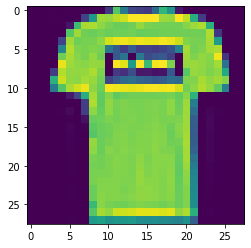

In [11]:
plt.figure()
plt.imshow(X_train[1])

Data Preprocessing

In [15]:
X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)

## CNN initialization

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [93]:
model = Sequential()

model.add(Flatten(input_shape = X_train[0].shape))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [94]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_77 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_78 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_79 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_80 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_81 (Dense)             (None, 150)             

In [95]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training the model

In [96]:
history = model.fit(X_train, Y_train, batch_size=10000, epochs=100)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 15us/sample - loss: 2.2035 - accuracy: 0.2218
Epoch 2/100
60000/60000 [==============================] - 0s 4us/sample - loss: 1.7400 - accuracy: 0.3007
Epoch 3/100
60000/60000 [==============================] - 0s 4us/sample - loss: 1.2362 - accuracy: 0.5827
Epoch 4/100
60000/60000 [==============================] - 0s 4us/sample - loss: 1.0111 - accuracy: 0.6353
Epoch 5/100
60000/60000 [==============================] - 0s 4us/sample - loss: 0.8478 - accuracy: 0.6981
Epoch 6/100
60000/60000 [==============================] - 0s 4us/sample - loss: 0.7127 - accuracy: 0.7382
Epoch 7/100
60000/60000 [==============================] - 0s 4us/sample - loss: 0.6295 - accuracy: 0.7703
Epoch 8/100
60000/60000 [==============================] - 0s 4us/sample - loss: 0.5710 - accuracy: 0.7924
Epoch 9/100
60000/60000 [==============================] - 0s 4us/sample - loss: 0.5627 - accuracy: 0.7979
Epoch 10/100


## Learning Curves

Plotting the accuracy vs epoch curve

Text(0, 0.5, 'Accuracy')

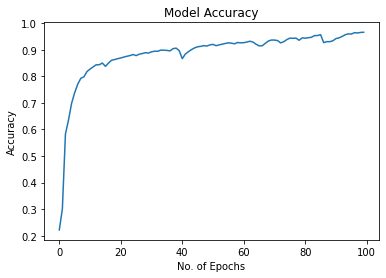

In [97]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

Plotting the error vs epoch curve

Text(0, 0.5, 'Loss')

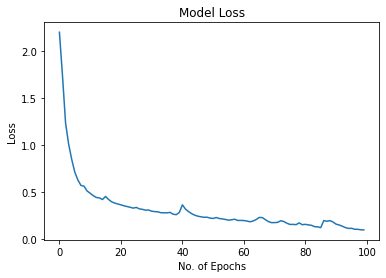

In [98]:
plt.figure()
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

## Predicting the test results

In [99]:
Y_pred = model.predict_classes(X_test)

Accuracy of the model over the test data

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
print(accuracy_score(Y_pred, Y_test))

0.8908


## Confusion Matrix

In [102]:
!pip install mlxtend

In [104]:
from mlxtend.plotting import plot_confusion_matrix

In [105]:
from sklearn.metrics import confusion_matrix

In [107]:
cm = confusion_matrix(Y_pred, Y_test)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f873c1b34a8>)

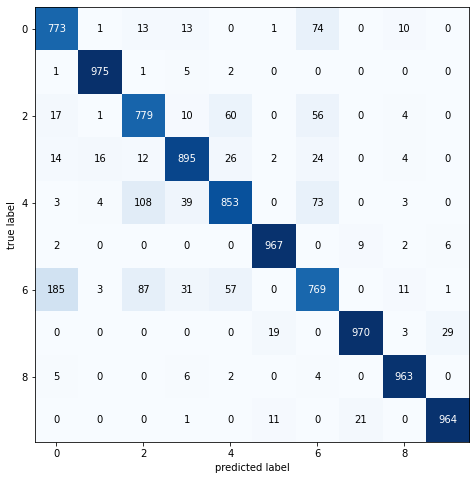

In [108]:
plot_confusion_matrix(conf_mat = cm, figsize = (8,8))